In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

x_offset=y_offset=50

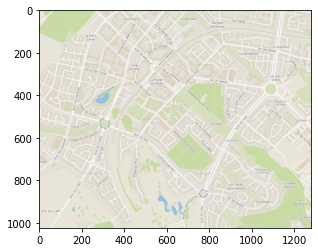

In [3]:
map_image = cv2.cvtColor(cv2.imread('save.png'), cv2.COLOR_BGR2RGB)
plt.imshow(map_image)

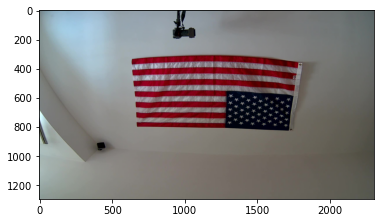

In [12]:
frame = cv2.cvtColor(cv2.imread('frame.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

1296
1024
2304
1280
(1995, 987)
259


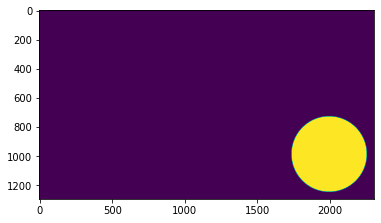

In [25]:
mask = np.zeros(frame.shape[:2], dtype="uint8")
circle_radius = int(min(frame.shape[0], frame.shape[1])*0.2) # 20% of the min frame size
circle_center = (frame.shape[1] - circle_radius - y_offset, frame.shape[0] - circle_radius - x_offset)
cv2.circle(mask, circle_center, circle_radius, 255, -1)

plt.imshow(mask)

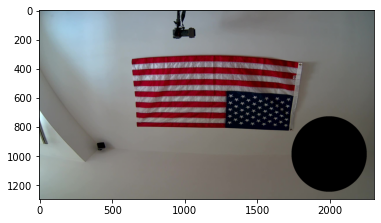

In [26]:
mask_inv = cv2.bitwise_not(mask)
frame_masked = cv2.bitwise_and(frame,frame,mask = mask_inv)
plt.imshow(frame_masked)

(1024, 1280)
(518, 414)
resize of : 2.473429951690821
resize of : 2.471042471042471
832
1246
1736
2254


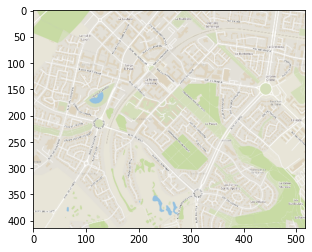

In [53]:
map_image = cv2.cvtColor(cv2.imread('save.png'), cv2.COLOR_BGR2RGB)

print(map_image.shape[0:2])

min_shape = circle_radius*2
if min(map_image.shape[0:2]) == map_image.shape[0]:
    resize = (int(min_shape), int(min_shape * map_image.shape[0]/map_image.shape[1]))
else:
    resize = (int(min_shape * map_image.shape[0]/map_image.shape[0]), int(min_shape))

map_image = cv2.resize(map_image, resize)


print(frame.shape[0] - map_image.shape[0] - y_offset)
print(frame.shape[0] - y_offset)
print(frame.shape[1] - map_image.shape[1] - x_offset)
print(frame.shape[1] - x_offset)

plt.imshow(map_image)

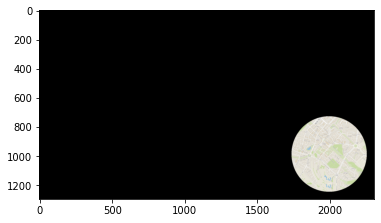

In [56]:
frame[frame.shape[0] - map_image.shape[0] - y_offset : frame.shape[0] - y_offset,
      frame.shape[1] - map_image.shape[1] - x_offset : frame.shape[1] - x_offset] = map_image
map_masked = cv2.bitwise_and(frame,frame,mask = mask)
plt.imshow(map_masked)

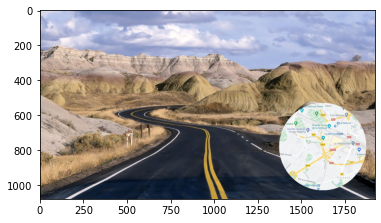

In [7]:
rows,cols,channels = frame.shape
dst = cv2.add(frame_masked,map_masked)
frame[0:rows, 0:cols ] = dst
plt.imshow(dst)

 lat: 10, lon :15
03/31/2021, 20:47:09,  lat: 10, lon :15


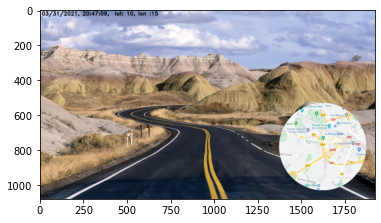

In [8]:
from datetime import datetime
date = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
lat = 10;
lon = 15;
localisation = " lat: " + str(lat) + ", " + "lon :" + str(lon)
print(localisation)
text = date + ", " + localisation
print(text)
cv2.putText(frame,text,(10,30), cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,0),2,cv2.LINE_AA)
plt.imshow(frame)